In [1]:
!pip install torch torchvision

!pip install ipywidgets

     |████████████████▍               | 384.6 MB 3.4 MB/s eta 0:01:48

     |████████████████▌               | 385.9 MB 3.4 MB/s eta 0:01:47

     |█████████████████████████▏      | 590.1 MB 843 kB/s eta 0:03:118    |████████████████▌               | 387.3 MB 7.9 MB/s eta 0:00:47     |████████████████▌               | 387.8 MB 7.9 MB/s eta 0:00:47��█████▋               | 390.4 MB 7.9 MB/s eta 0:00:46     |████████████████▊               | 392.1 MB 7.9 MB/s eta 0:00:46�▉               | 394.1 MB 7.9 MB/s eta 0:00:46�███████████▉               | 394.3 MB 7.9 MB/s eta 0:00:46           | 394.6 MB 7.9 MB/s eta 0:00:46   | 395.2 MB 7.9 MB/s eta 0:00:46��█               | 396.6 MB 7.9 MB/s eta 0:00:45     |█████████████████               | 397.5 MB 7.9 MB/s eta 0:00:45��██████               | 398.2 MB 7.9 MB/s eta 0:00:45a 0:00:45s eta 0:00:45     |█████████████████▏              | 402.3 MB 1.9 MB/s eta 0:03:02█████████████████▍              | 408.3 MB 1.9 MB/s eta 0:02:59  | 412.6 MB 1.9 MB/s eta 0:02:56.9 MB/s eta 0:02:54�████████████▉              | 417.0 MB 1.9 MB/s eta 0:02:54��███████▉              | 418.3 MB 1.9 MB/s eta 0:

     |███████████████████████████████▎| 732.8 MB 818 kB/s eta 0:00:223    |█████████████████████████▏      | 590.7 MB 843 kB/s eta 0:03:10     |█████████████████████████▎      | 591.8 MB 843 kB/s eta 0:03:09     |█████████████████████████▎      | 592.3 MB 843 kB/s eta 0:03:08     |█████████████████████████▎      | 592.5 MB 843 kB/s eta 0:03:08     |█████████████████████████▍      | 595.7 MB 843 kB/s eta 0:03:04     |█████████████████████████▌      | 599.0 MB 843 kB/s eta 0:03:00     |█████████████████████████▊      | 602.5 MB 4.6 MB/s eta 0:00:32     |█████████████████████████▊      | 602.7 MB 4.6 MB/s eta 0:00:32     |█████████████████████████▊      | 603.4 MB 4.6 MB/s eta 0:00:32   | 612.6 MB 4.6 MB/s eta 0:00:30:32�█████████▏     | 613.4 MB 4.3 MB/s eta 0:00:32 | 616.6 MB 4.3 MB/s eta 0:00:31███████████████████▎     | 617.0 MB 4.3 MB/s eta 0:00:31  | 617.3 MB 4.3 MB/s eta 0:00:3131�█████████▍     | 618.7 MB 4.3 MB/s eta 0:00:31�     | 619.9 MB 4.3 MB/s eta 0:00:31��█████████████████

     |████████████████████████████████| 750.6 MB 5.6 kB/s eta 0:00:01733.5 MB 818 kB/s eta 0:00:21��████████████████▎| 733.7 MB 818 kB/s eta 0:00:21��███████▎| 734.0 MB 818 kB/s eta 0:00:21 734.3 MB 818 kB/s eta 0:00:20:20�██████████████████████████▎| 734.9 MB 818 kB/s eta 0:00:20�█████████████████▍| 735.2 MB 818 kB/s eta 0:00:19��████████▍| 736.2 MB 6.9 MB/s eta 0:00:03��| 736.5 MB 6.9 MB/s eta 0:00:03:00:02     |███████████████████████████████▌| 738.5 MB 6.9 MB/s eta 0:00:02��█████▌| 738.7 MB 6.9 MB/s eta 0:00:02 MB 6.9 MB/s eta 0:00:02�██████▋| 740.2 MB 6.9 MB/s eta 0:00:02.5 MB 6.9 MB/s eta 0:00:02█████████████████████████▋| 741.1 MB 6.9 MB/s eta 0:00:02████████████████▋| 741.4 MB 6.9 MB/s eta 0:00:02███████▋| 741.7 MB 6.9 MB/s eta 0:00:02��█████████████████████████▋| 742.6 MB 3.5 MB/s eta 0:00:03:02| 744.2 MB 3.5 MB/s eta 0:00:020:02��██████████████████████████▊| 744.8 MB 3.5 MB/s eta 0:00:02��█████████████████▊| 745.1 MB 3.5 MB/s eta 0:00:02�████████████████▉| 745.8 MB 3.5 MB/s e

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import torch
from torch import nn
from torch.nn import Sequential, Linear, MaxPool2d, ReLU, Conv2d
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np

import matplotlib.pyplot as plt
from IPython import display

In [215]:
torch.manual_seed(42)

In [238]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()       
        self.flatten = nn.Flatten()

        self.conv_stack = Sequential(
            Conv2d(1, 6, kernel_size=3),
            ReLU(),
            MaxPool2d(2,2),
            Conv2d(6, 32, kernel_size=4)
        )
        self.linear_relu_stack = Sequential(
            Linear(32*10*10, 256),
            ReLU(),
            Linear(256,512),
            ReLU(),
            Linear(512,47)
        )
        
        #self.stack1 = nn.Sequential(
        #    Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1), 
        #    ReLU(),
        #    MaxPool2d(kernel_size=2, stride=2),
        #    Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
        #    ReLU(),
        #    nn.Dropout(0.4),
        #    Conv2d(128,256, kernel_size=3, stride=1, padding=1),
        #    ReLU(),
        #    MaxPool2d(kernel_size=2, stride=2),
        #    Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
        #    ReLU(),
        #    MaxPool2d(kernel_size=2, stride=2),
        #    nn.Dropout(0.4),
        #)
        
        self.classifier = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 47)
        )
        
    def forward(self, x):
        x = self.conv_stack(x)
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        return x

In [223]:
def train(dataloader, model, loss_fn, optimizer, device):
    size = len(dataloader.dataset)
    model.train()
    losses = []
    for batch, (X, y) in enumerate(dataloader):
        X , y = X.to(device), y.to(device)
        
        pred = model(X)
        #pred = model.forward(X)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        loss, current = loss.item(), batch * len(X)
        if batch % 100 == 0:
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")
        losses.append(loss)
    return np.array(losses).mean()

In [224]:
def test(dataloader, model, loss_fn, device):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    model.eval()

    test_loss, correct = 0,0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred,y)#.item()
            
            max_scores, max_idx_class = model(X).max(dim=1)
            #correct += 1 if max_idx_class == y else 0
            correct += (pred.argmax() == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size

    print(f"Test Error: \n Accuracy: {(100*correct)}")
    return correct * 100

In [219]:
    training_data = datasets.EMNIST(
        root="data",
        train=True,
        download=True,
        transform=ToTensor(),
        split="balanced"
    )
    test_data = datasets.EMNIST(
        root="data",
        train=False,
        download=True,
        transform=ToTensor(),
        split="balanced"
    )

In [239]:
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# Remove this
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

class_names, indexes = np.unique(training_data.targets, return_index=True)
perm = class_names.argsort()
indexes = indexes[perm]
class_names = [training_data.classes[i] for i in class_names]

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

model = NeuralNetwork().to(device)
#print(model)

loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-2

optimizer = torch.optim.SGD(model.parameters(), learning_rate)

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Using cpu device


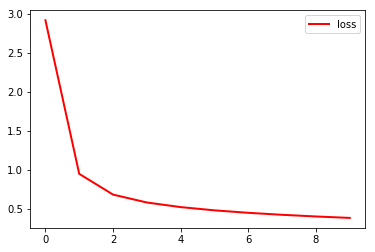

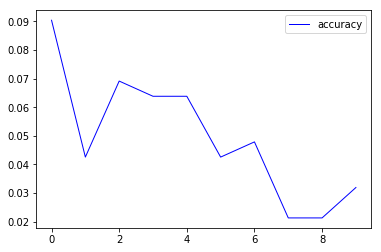

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

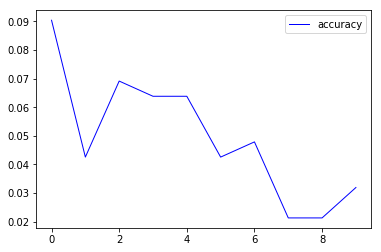

In [240]:
epochs = 10
history = {"losses": [], "accuracies": []}
for t in range(epochs):
    print(f"Epoch: {t+1}")
    history['losses'].append(
        train(train_dataloader, model, loss_fn, optimizer, device)
    )
    history['accuracies'].append(
        test(test_dataloader, model, loss_fn, device)
    )
    
    plt.clf()
    fig1 = plt.figure()
    plt.plot(history["losses"], 'r-', lw=2, label='loss')
    plt.legend()
    display.clear_output(wait=True)
    display.display(plt.gcf())

    plt.clf()
    fig2 = plt.figure()
    plt.plot(history["accuracies"], 'b-', lw=1, label='accuracy')
    plt.legend()

    display.display(plt.gcf())

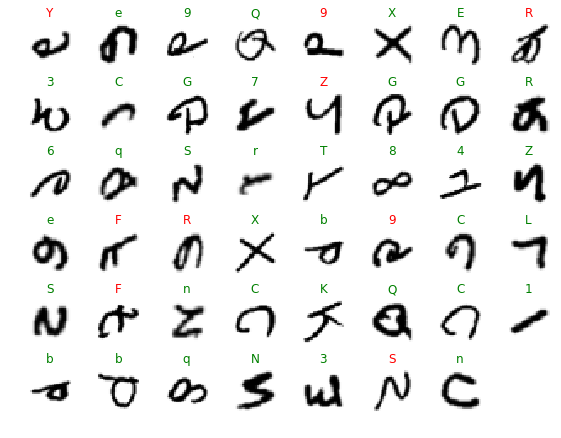

In [241]:
n_rows = 6
n_cols = 8
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col

        if index > 46:
            break

        plt.subplot(n_rows, n_cols, index + 1)
        X, y = test_data.__getitem__(index)
        y_pred = model(X.to(device)[None,...])
        y_pred = y_pred.argmax(1)
        plt.imshow(X[0], cmap="binary", interpolation="nearest")
        plt.axis('off')

        if y == y_pred:
            plt.title(class_names[y_pred], fontsize=12, color='g')
        else:
            plt.title(class_names[y_pred], fontsize=12, color='r')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()